In [11]:
import spikeinterface.full as si
import matplotlib.pyplot as plt
import numpy as np 

In [12]:
# spikeglx_folder = r'/media/cat/data/noah/danlab/Subjects/DY_009/2020-02-27/001/raw_ephys_data/probe00/chunk_000000_to_000999mxdaelYevg'

In [13]:
# raw_rec = si.read_spikeglx(spikeglx_folder, stream_name='_spikeglx_ephysData_g0_t0.imec0.ap.stream.cbin', load_sync_channel=False)

In [54]:
from one.api import ONE
from brainbox.io.spikeglx import Streamer

one = ONE()

pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'

time0 = 100 # timepoint in recording to stream
time_win = 5 # number of seconds to stream
band = 'ap' # either 'ap' or 'lf'

sr = Streamer(pid=pid, one=one, remove_cached=False, typ=band)
s0 = time0 * sr.fs
tsel = slice(int(s0), int(s0) + int(time_win * sr.fs))

# Important: remove sync channel from raw data, and transpose
raw = sr[tsel, :-sr.nsync].T

In [55]:
raw.shape

(384, 150001)

In [56]:
from neurodsp.voltage import destripe
destriped = destripe(raw, fs=sr.fs)

In [57]:
help(destripe)

Help on function destripe in module neurodsp.voltage:

destripe(x, fs, h=None, neuropixel_version=1, butter_kwargs=None, k_kwargs=None, channel_labels=None, k_filter=True)
    Super Car (super slow also...) - far from being set in stone but a good workflow example
    :param x: demultiplexed array (nc, ns)
    :param fs: sampling frequency
    :param neuropixel_version (optional): 1 or 2. Useful for the ADC shift correction. If None,
     no correction is applied
    :param channel_labels:
      None: (default) keep all channels
     OR (recommended to pre-compute)
        index array for the first axis of x indicating the selected traces.
     On a full workflow, one should scan sparingly the full file to get a robust estimate of the
     selection. If None, and estimation is done using only the current batch is provided for
     convenience but should be avoided in production.
      OR (only for quick display or as an example)
       True: deduces the bad channels from the data provi

In [58]:
destriped.shape

(384, 150001)

In [59]:
# left = raw[0::2]
# right = raw[1::2]
# im = np.stack((left,right)).T

# im = np.stack((left,right))

raw = np.stack((raw[0::2],raw[1::2])).T

In [60]:
destriped = np.stack((destriped[0::2],destriped[1::2])).T

In [61]:
#I should also motion correct this data here before visualising

In [62]:

print(destriped.shape)
max_val_dstriped = np.max(destriped)
min_val_dstriped = np.min(destriped)
stdev_dstriped = np.std(destriped)
mean_dstriped = np.mean(destriped)
print(max_val_dstriped)
print(min_val_dstriped)
print(stdev_dstriped, mean_dstriped)

(150001, 192, 2)
0.00023861731413610628
-0.0005290131487800222
1.4492177258041783e-05 -3.3789887318316994e-11


In [63]:
print(raw.shape)
max_val = np.max(raw)
min_val = np.min(raw)
stdev = np.std(raw)
mean = np.mean(raw)
print(max_val)
print(min_val)
print(stdev, mean)

(150001, 192, 2)
0.00031171876
-0.00049921876
4.3303484e-05 7.12881e-06


In [64]:
import ipywidgets as widgets
from ipywidgets import interactive

In [65]:
# import colorcet as cc

In [66]:
def wave_plotter(t=0):
        # fig, ax = plt.subplots(1,3)
        fig, ax = plt.subplots(1,2, figsize=(3,6))
        im = raw[t]
        im2 = destriped[t]
        ax[0].imshow(im[0:64], vmin=mean-stdev*3, vmax=mean+stdev*3)
        ax[1].imshow(im2[0:64], vmin=mean_dstriped-stdev_dstriped*3, vmax=mean_dstriped+stdev_dstriped*3)
        # ax[0].imshow(im[0:64], vmin=mean-stdev*3, vmax=mean+stdev*3)
        # ax[1].imshow(im[64:64*2], vmin=mean-stdev*3, vmax=mean+stdev*3)
        # ax[2].imshow(im[64*2:64*3], vmin=mean-stdev*3, vmax=mean+stdev*3)
        
        ax[0].set_axis_off()
        ax[1].set_axis_off()
        # ax[2].set_axis_off()
        
        # plt.ylim((-1.5,1.2))
        # plt.legend()
        plt.layout = 'tight'
        plt.show()

        
interactive_plot = interactive(wave_plotter, t=(0,raw.shape[0]-1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
output.layout.width  = '550px'

interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=150000), Output(layout=Layout(height='550px', wi…

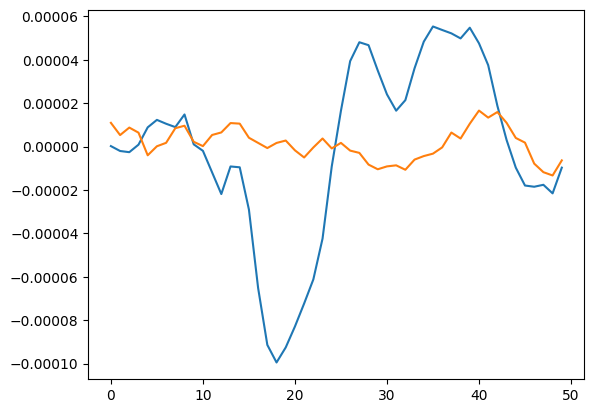

interactive(children=(IntSlider(value=24, description='t', max=49), Output()), _dom_classes=('widget-interact'…

In [171]:
#a spike:

spike = destriped[30:80,2:15,:]
spike2 = destriped[107:157,2*6:15*6,:]
def plot(t):
    fig, ax = plt.subplots(1,2)
    
    ax[0].imshow(spike[t], vmin=mean_dstriped-stdev_dstriped*3, vmax=mean_dstriped+stdev_dstriped*3)
    ax[1].imshow(spike2[t], vmin=mean_dstriped-stdev_dstriped*3, vmax=mean_dstriped+stdev_dstriped*3)
    plt.show()
    

interactive_plot = interactive(plot, t=(0,spike.shape[0]-1))

plot = spike[:,4:8,0:None].mean((1,2))
plot2 = spike2[:,4:8,0:None].mean((1,2))
# print(np.mean(plot[0]).shape)
# print(plot.shape)
# plt.plot(spike[:,4,1])
plt.plot(plot)
plt.plot(plot2)
plt.show()

interactive_plot

In [138]:
print(spike.shape)
spike.mean((1,2)).shape

(50, 13, 2)


(50,)

In [67]:
plt.imshow(im[95][0:20])
plt.show()

NameError: name 'im' is not defined

In [ ]:
#could a ML model or matrix fact. (in 3d) extract spikes?

In [ ]:
# %gui qt
# from viewephys.gui import viewephys
# v_raw = viewephys(raw, fs=sr.fs)
# v_des = viewephys(destriped, fs=sr.fs)

In [69]:
# si version
import spikeinterface as si
path_to_cbin = () 
rec = si.si.read_cbin_ibl(sr.target_dir)